In [1]:
import numpy as np
import scipy.misc
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
np.random.seed(1)
n = 10
l = 256
im = np.zeros((l, l))
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

In [4]:
mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im

img = mask + 0.2*np.random.randn(*mask.shape)

In [5]:
hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5

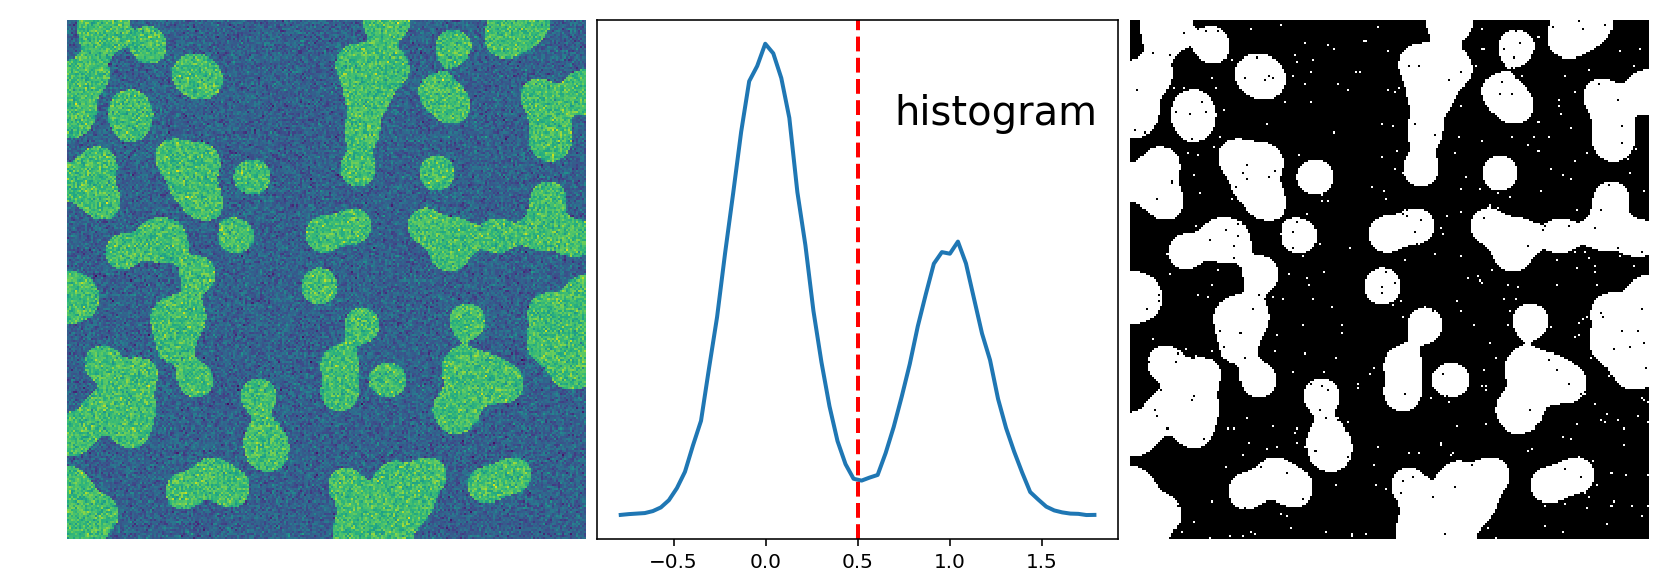

In [8]:
plt.figure(figsize=(11,4))

plt.subplot(131)
plt.imshow(img)
plt.axis('off')
plt.subplot(132)
plt.plot(bin_centers, hist, lw=2)
plt.axvline(0.5, color='r', ls='--', lw=2)
plt.text(0.57, 0.8, 'histogram', fontsize=20, transform = plt.gca().transAxes)
plt.yticks([])
plt.subplot(133)
plt.imshow(binary_img, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)
plt.show()

In [14]:
# Remove small white regions
open_img = ndimage.binary_opening(binary_img)
# Remove small black hole
close_img = ndimage.binary_closing(open_img)

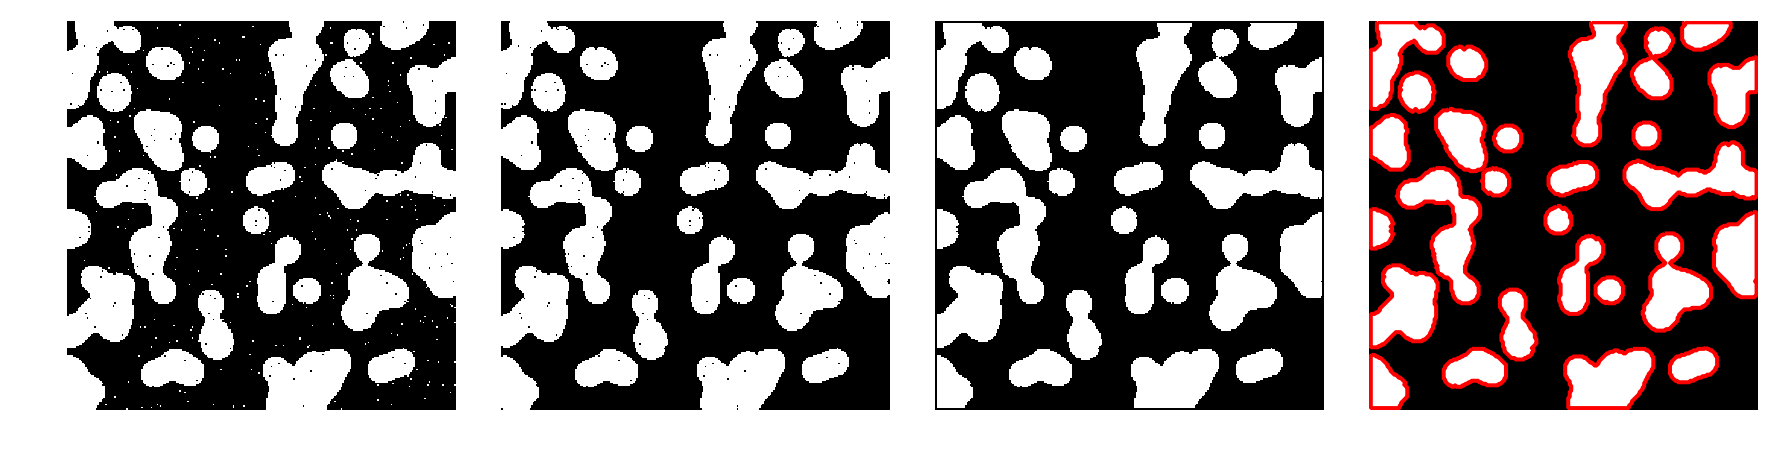

In [15]:
plt.figure(figsize=(12, 3))

plt.subplot(141)
plt.imshow(binary_img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(142)
plt.imshow(open_img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(143)
plt.imshow(close_img, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(144)
plt.imshow(mask, cmap=plt.cm.gray)
plt.contour(close_img, [0.5], linewidths=2, colors='r')
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.3, top=1, bottom=0.1, left=0, right=1)

plt.show()

In [24]:
# from skimage import filters
from skimage import measure
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [25]:
n = 12
l = 256
np.random.seed(1)
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma= l / (4. * n))
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

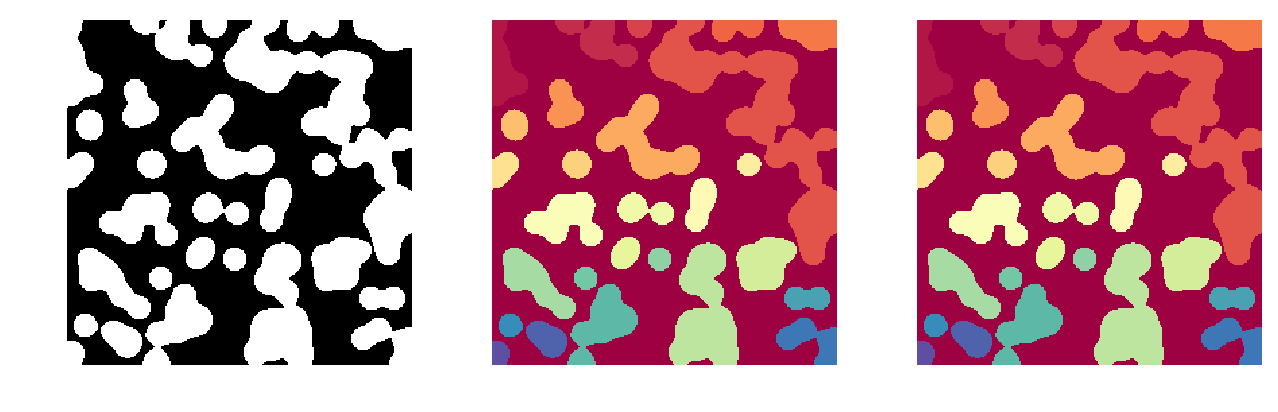

In [27]:
plt.figure(figsize=(9, 3.5))
plt.subplot(131)
plt.imshow(blobs, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(all_labels, cmap='Spectral')
plt.axis('off')
plt.subplot(133)
plt.imshow(blobs_labels, cmap='Spectral')
plt.axis('off')

plt.tight_layout()
plt.show()

In [36]:
ndimage.find_objects(blobs_labels)

[(slice(0, 65, None), slice(0, 27, None)),
 (slice(0, 35, None), slice(47, 108, None)),
 (slice(0, 13, None), slice(100, 119, None)),
 (slice(0, 182, None), slice(116, 256, None)),
 (slice(0, 16, None), slice(163, 202, None)),
 (slice(0, 23, None), slice(212, 256, None)),
 (slice(44, 80, None), slice(41, 68, None)),
 (slice(55, 119, None), slice(77, 154, None)),
 (slice(66, 90, None), slice(7, 27, None)),
 (slice(96, 118, None), slice(52, 74, None)),
 (slice(98, 126, None), slice(0, 20, None)),
 (slice(99, 116, None), slice(182, 200, None)),
 (slice(117, 157, None), slice(143, 167, None)),
 (slice(128, 168, None), slice(24, 82, None)),
 (slice(128, 152, None), slice(93, 135, None)),
 (slice(161, 185, None), slice(88, 110, None)),
 (slice(161, 201, None), slice(181, 226, None)),
 (slice(165, 256, None), slice(131, 183, None)),
 (slice(169, 222, None), slice(8, 62, None)),
 (slice(169, 186, None), slice(116, 133, None)),
 (slice(183, 200, None), slice(61, 78, None)),
 (slice(196, 256, No

In [17]:
l = 100
x, y = np.indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)
radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2
circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2
circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2

# 4 circles
img = circle1 + circle2 + circle3 + circle4
mask = img.astype(bool)
img = img.astype(float)

img += 1 + 0.2*np.random.randn(*img.shape)
# Convert the image into a graph with the value of the gradient on
# the edges.
graph = image.img_to_graph(img, mask=mask)

# Take a decreasing function of the gradient: we take it weakly
# dependant from the gradient the segmentation is close to a voronoi
graph.data = np.exp(-graph.data/graph.data.std())

labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
label_im = -np.ones(mask.shape)
label_im[mask] = labels